L'ACP dans Scikit-learn
cf. http://cedric.cnam.fr/vertigo/Cours/ml/tpAcp.html

# ACP de données générées

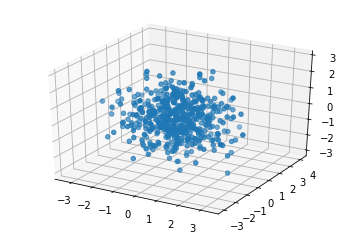

In [1]:
import numpy as np
# Return a sample (or samples) from the “standard normal” distribution.
# of dimension (500, 3)
rndn3d = np.random.randn(500, 3)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rndn3d[:, 0], rndn3d[:, 1], rndn3d[:, 2])

plt.show()

In [10]:
# Appliquons l'ACP
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(rndn3d)
print(pca.explained_variance_ratio_)
print(pca.components_)

[ 0.34686864  0.34379589  0.30933546]
[[-0.08639584  0.92233692 -0.37660372]
 [ 0.92453019 -0.06661541 -0.37524168]
 [ 0.37118687  0.38060083  0.84697303]]


In [11]:
# Appliquons une deuxième fois l'ACP sur un autre ensemble
rndn3d = np.random.randn(500,3)
pca = PCA(n_components=3)
pca.fit(rndn3d)
print(pca.explained_variance_ratio_)
print(pca.components_)

[ 0.36268926  0.33095617  0.30635457]
[[-0.97230454 -0.2013946   0.11859214]
 [ 0.00976136 -0.54196655 -0.84034337]
 [-0.23351359  0.81591205 -0.52892243]]


## Question
* Générez un autre tableau de données en utilisant de nouveau np.random.randn(500,3) et appliquez l’ACP à ces nouvelles données. Comparez les résultats avec ceux obtenus sur rndn3d. Que constatez-vous ? Expliquez.
Les valeurs propres sont globalement les mêmes entre les 3. C'est normal. Les données sont issues d'une loi normale. Les différentes observations et variables ne sont pas corrélés entre elles. On a donc Variance_Expliquée_i = 1/n_variable 

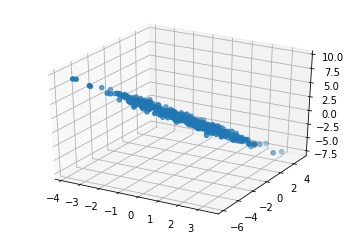

In [21]:
# Appliquons une déformation et une rotation au nuage des observations
# Matrice de déformation
s1 = np.array([[3, 0, 0],[0, 1, 0],[0, 0, 0.2]])
# Matrice de rotation
r1 = np.array([[0.36,0.48,-0.8],[-0.8,0.6,0],[0.48,0.64,0.6]])
rndef = rndn3d.dot(s1).dot(r1)               
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rndef[:, 0], rndef[:, 1], rndef[:, 2])

plt.show()

In [22]:
# Appliquons l'ACP
pca = PCA(n_components=3)
pca.fit(rndef)
print(pca.explained_variance_ratio_)
print(pca.components_)

[ 0.90787076  0.0884936   0.00363563]
[[-0.35042675 -0.4858928   0.800693  ]
 [-0.80075952  0.598846    0.01294804]
 [-0.48578316 -0.6366252  -0.59893495]]


## Question
 * Que constatez-vous par rapport à l’application directe de l’ACP sur les données de rndn3d ? Expliquez. Peut-on lier les rapports entre les valeurs propres obtenues aux rapports entre les éléments de la diagonale de la matrice de déformation s1 ?
On constate que la première valeur propre explique 90% de la variance. 
Variance_expliquée_i = coef_i^2 /sum(coef_i^2)

## Question
 * Générez un autre tableau de données en utilisant les mêmes matrices de transformation et appliquez l’ACP à ces nouvelles données. Comparez les résultats avec ceux obtenus sur rndef. Que constatez-vous ? Expliquez.

In [23]:
rndn3d = np.random.randn(500,3)
rndef = rndn3d.dot(s1).dot(r1)               
pca = PCA(n_components=3)
pca.fit(rndef)
print(pca.explained_variance_ratio_)
print(pca.components_)

[ 0.88701559  0.10849408  0.00449033]
[[-0.37029379 -0.47735706  0.79687687]
 [ 0.79576655 -0.60556275  0.00702462]
 [-0.4792057  -0.63672913 -0.60410091]]


On trouve les mêmes vecteurs propres et valeurs propres. Ce qui est normal puisque l'ensemble de départ a la même dispersion que le premier tableau de données

# ACP des données sur le sommeil des mammifères

In [39]:
from io import StringIO
mammals = np.loadtxt('mammals.csv', delimiter=';', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], skiprows=1)

# Affichage des deux premières lignes
print mammals[:2, :]

noms = np.genfromtxt('mammals.csv', dtype='str', delimiter=';', usecols=[0], skip_header=1)
print noms

[[  6.65400000e+03   5.71200000e+03   8.35000000e+00   1.80000000e+00
    3.30000000e+00   3.86000000e+01   6.45000000e+02   3.00000000e+00
    5.00000000e+00   3.00000000e+00]
 [  1.00000000e+00   6.60000000e+00   6.30000000e+00   2.00000000e+00
    8.30000000e+00   4.50000000e+00   4.20000000e+01   3.00000000e+00
    1.00000000e+00   3.00000000e+00]]
['African elephant  ' 'African giant pouched rat' 'Arctic Fox  '
 'Arctic ground squirrel ' 'Asian elephant  ' 'Baboon   ' 'Big brown bat '
 'Brazilian tapir  ' 'Cat   ' 'Chimpanzee   ' 'Chinchilla   ' 'Cow   '
 'Desert hedgehog  ' 'Donkey   ' 'Eastern American mole ' 'Echidna   '
 'European hedgehog  ' 'Galago   ' 'Genet   ' 'Giant armadillo  '
 'Giraffe   ' 'Goat   ' 'Golden hamster  ' 'Gorilla   ' 'Gray seal  '
 'Gray wolf  ' 'Ground squirrel  ' 'Guinea pig  ' 'Horse   ' 'Jaguar   '
 'Kangaroo   ' 'Lesser short-tailed shrew ' 'Little brown bat ' 'Man   '
 'Mole rat  ' 'Mountain beaver  ' 'Mouse   ' 'Musk shrew  '
 'N. American opossum

## Question
 * Appliquez une ACP aux données de mammals et affichez les valeurs propres. Comparez les deux premières aux valeurs vues en cours. Que constatez-vous ? Pourquoi ?

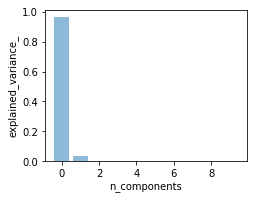

0.961492648603
[  6.91530256e-01   7.17839107e-01  -5.17706454e-04  -7.03276614e-05
  -1.19061030e-03   5.83095626e-03   8.03554134e-02   5.62370320e-05
   4.56367148e-04   1.63599468e-04]


In [40]:
pca = PCA(n_components = 10)
pca.fit(mammals)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

print(pca.explained_variance_ratio_[0])
print(pca.components_[0, :])

On constate que plus de 96% de la variance est expliquée par le premier vecteur propre.
Cela vient du fait que l'on utilise l'ACP générale au lieu d'une ACP réduite. Ainsi, la taille et le poids du cerveau, qui sont des grandes valeurs (ex. African elephant  ;6654;5712) dominent les autres.

## Question :
* Normalisez les données de mammals et appliquez de nouveau l’ACP. Comment ont évolué les valeurs propres les plus grandes ? Affichez le graphique de décroissance des valeurs propres.

In [45]:
# mammals est centrée réduite
mammalsNorm = np.zeros((62, 10))
for i in range(0, 10):
    c = mammals[:, i]
    mean = c.mean()
    std = c.std()
    mammalsNorm[:, i] = (c - mean) / std

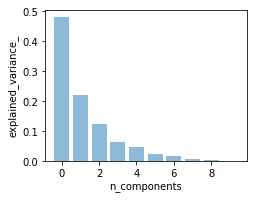

[ 0.48017524  0.22078825]
[ 0.2507328   0.28338618 -0.32111983 -0.29060816 -0.38538159  0.24828001
  0.37336221  0.25423678  0.38127144  0.33119293]


In [46]:
pca = PCA(n_components = 10)
pca.fit(mammalsNorm)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

print(pca.explained_variance_ratio_[0:2])
print(pca.components_[0, :])

On retrouve les valeurs attendues (48% de variance expliquée pour le premier vecteur propre, 22% pour le deuxième)

[[ 6.50530263  6.7330641   3.43983054 -2.05458566 -1.38117895  0.06000125
   0.66178241  0.31378774 -0.37607103 -0.30709013]
 [-0.42443283 -0.80647942 -0.41704187 -1.29587063  0.09294702  0.39025445
  -0.16477426  0.09485348  0.31128589 -0.1266842 ]]


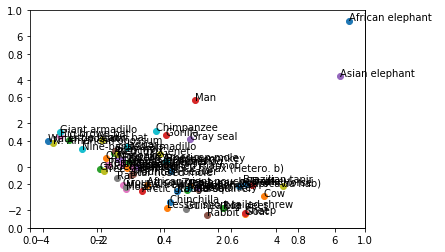

In [47]:
mNT = pca.transform(mammalsNorm)

# On affiche les deux premières lignes avec les valeurs centrées réduites
print(mNT[:2, :])

fig, ax = plt.subplots()
ax = fig.add_subplot(111)
for i in range(len(noms)):
    x, y = mNT[i, 0], mNT[i, 1]
    ax.scatter(x, y)
    ax.text(x, y, noms[i])
plt.show()

## Question
 * Réalisez l’affichage des projections sur les 3 premiers axes principaux ; la possibilité de rotation du graphique facilite la lecture des étiquettes textuelles.

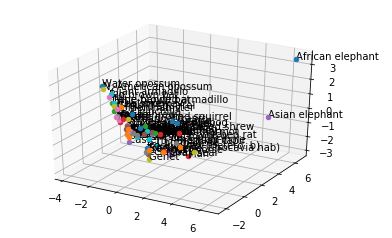

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(noms)):
    x, y, z = mNT[i, 0], mNT[i, 1], mNT[i, 2]
    ax.scatter(x, y, z)
    ax.text(x, y, z, noms[i])
    
plt.show()

## Question
 * Les résultats de l’analyse du nuage des variables ne sont pas directement disponibles. Comment pouvez-vous les obtenir ? Affichez la projection du nuage des variables sur les deux premiers axes factoriels.
Soit on peut appliquer les relations de transition
Soit on transpose la matrice et on refait l'analyse
```
              n
φαj = (1/√λα) ∑ x_ij * ψ_αi
              i=1
```

In [ ]:
for j in range(0, 2):
    fact = mammalsNorm.components_[j]
    

# ACP sur les données « feuilles »
Dataset from https://archive.ics.uci.edu/ml/datasets/Leaf

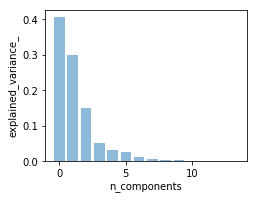

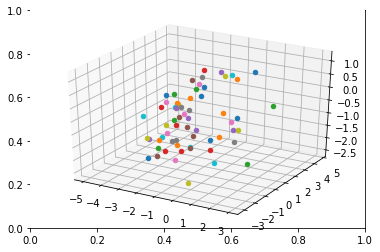

In [53]:
leaf = np.loadtxt('leaf.csv', delimiter=',')

# Standardize a dataset along any axis
# Center to the mean and component wise scale to unit variance.
# On ignore les deux premières colonnes qui sont l'espèce et le numéro d'espèce (nominal)
from sklearn import preprocessing
leafN = preprocessing.scale(leaf[:,2:])

pca = PCA()
pca.fit(leafN)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='individual explained variance')
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

leafMT = pca.transform(leafN)
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(noms)):
    x, y, z = leafMT[i, 0], leafMT[i, 1], leafMT[i, 2]
    ax.scatter(x, y, z)
plt.show()

## Question
 * Affichez les projections des données sur les 3 premiers axes principaux en utilisant l’étiquette de classe pour donner une couleur aux marques.

In [62]:
classes = np.loadtxt('leaf.csv', dtype=int, delimiter=',', usecols = [1])

fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
colors = plt.get_cmap('tab20c')
print classes[3]
for i in range(len(noms)):
    x, y, z = leafMT[i, 0], leafMT[i, 1], leafMT[i, 2]
    ax.scatter(x, y, z, c=classes[i], cmap=colors)
plt.show()

4


TypeError: object of type 'numpy.int64' has no len()

In [57]:
print plt.get_cmap('tab20c')[0]

TypeError: 'ListedColormap' object does not support indexing